In [1]:
# MUSIC PREDICTION CODE

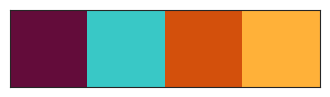

In [2]:
        import numpy as np
        import os
        import pandas as pd
        # To make this notebook's output stable across runs
        np.random.seed(42)

        # To plot pretty figures
        %matplotlib inline
        import matplotlib as mpl
        import matplotlib.pyplot as plt
        mpl.rc('axes', labelsize=14)
        mpl.rc('xtick', labelsize=12)
        mpl.rc('ytick', labelsize=12)
        import seaborn as sns
        #set style of plots
        sns.set_style('white')
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
# Ignore useless warnings (see SciPy issue #5998)


In [3]:
path='data_moods.csv'

In [4]:
#data=pd.read_csv('data_moods.csv')
data = pd.read_csv('data_moods.csv', encoding='unicode_escape')

In [5]:
features = data[['danceability','liveness','acousticness','loudness','speechiness','valence','energy']]

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'energy'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

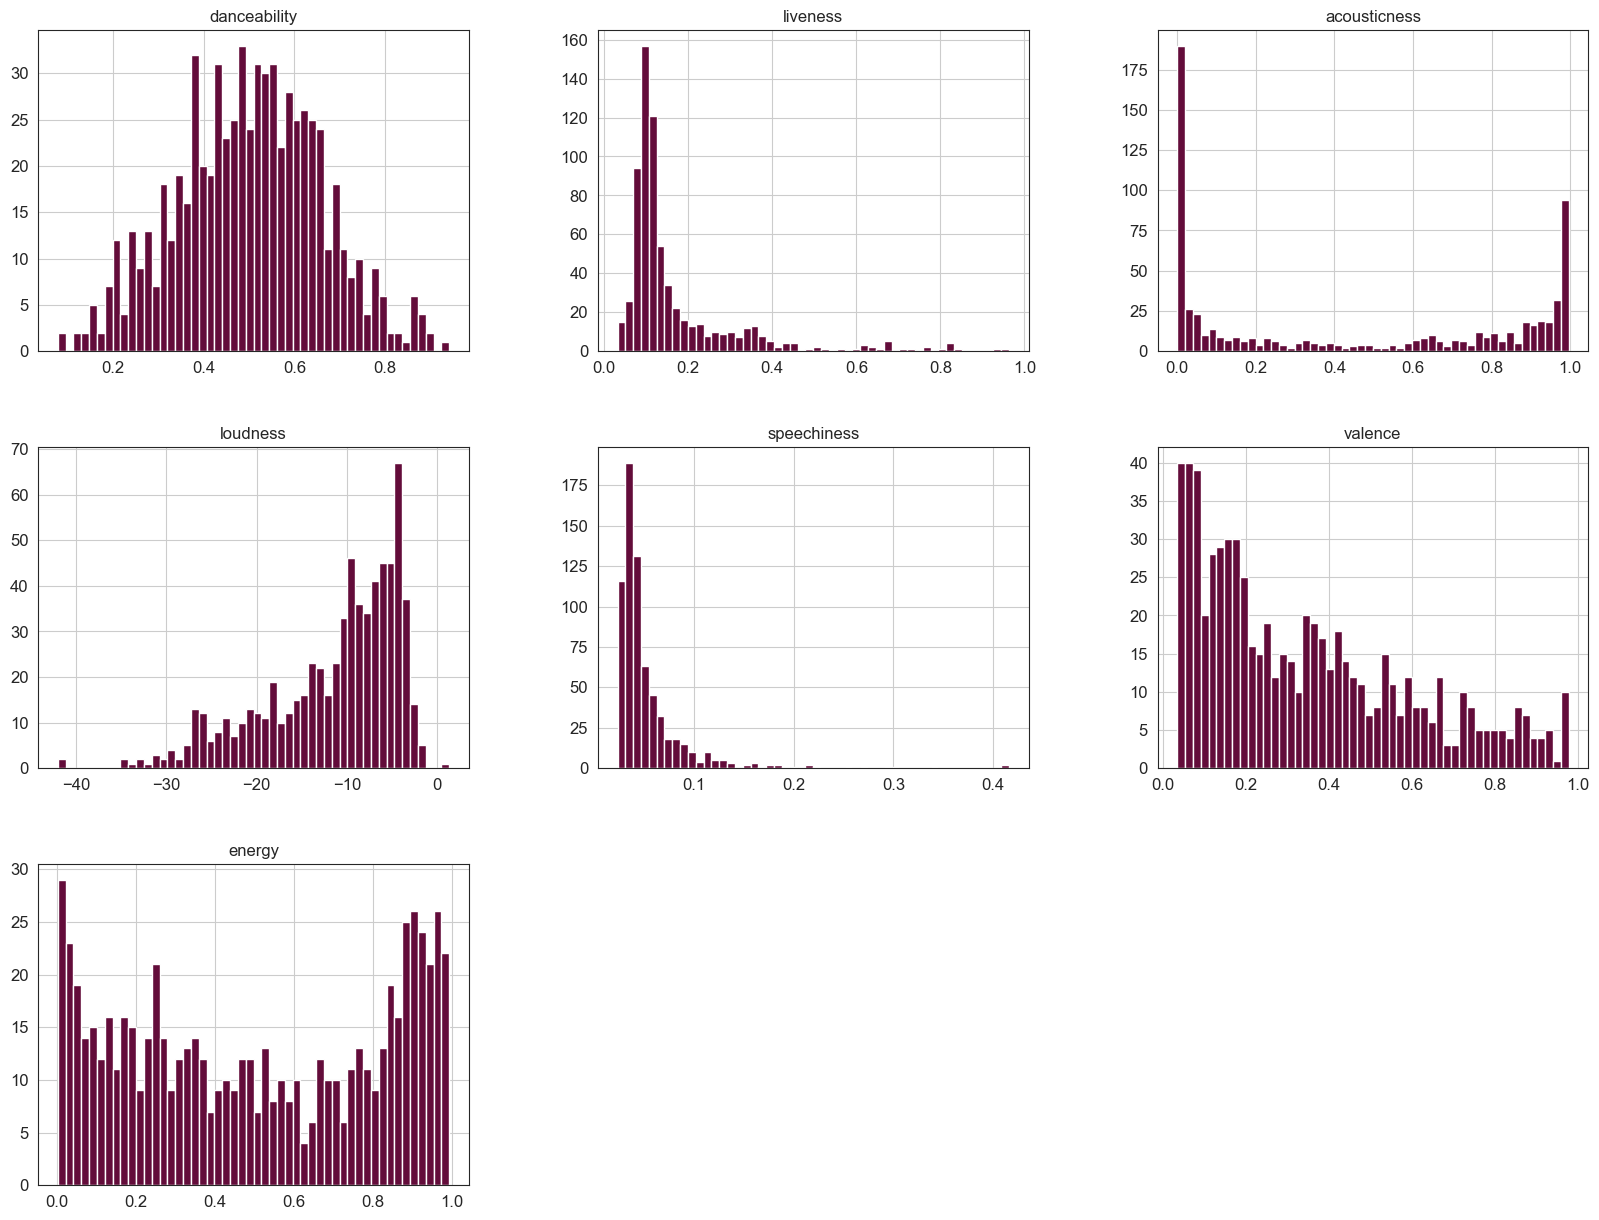

In [6]:
from sklearn import preprocessing

loudness = features[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
data['loudness'] = pd.DataFrame(loudness_scaled)
features.hist(bins=50,figsize=(20,15))

In [7]:
from sklearn.cluster import KMeans

sse = {}
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    sse[k]=km.inertia_

C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
labels=kmeans.labels_

C:\Users\SACHIN giyo SUNNY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
rfm=data.assign(Cluster=labels)
group=rfm.groupby(["Cluster"])
group.agg({
    
    'danceability':'mean',
    'loudness':'mean',
     'valence':'mean',
    'acousticness':['mean','count'],
   

}).round(1)

danceability loudness valence acousticness      
                mean     mean    mean         mean count
Cluster                                                 
0                0.5      0.7     0.4          0.5   215
1                0.4      0.3     0.2          1.0    74
2                0.5      0.9     0.4          0.1   281
3                0.4      0.5     0.2          0.9   117

In [10]:
rfm[rfm['Cluster']==1]

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,Cluster
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,31-07-2020,27,129410,0.394,0.995,0.0475,0.955,0.1050,0.1720,0.359456,0.0720,71.241,6,5,Calm,1
15,After The Rain,After The Rain,Comet Blue,2XBc2jWnvPqNO2LebVtLaY,03-08-2020,24,116625,0.456,0.993,0.0337,0.948,0.1260,0.3000,0.349354,0.0334,97.199,0,4,Calm,1
27,Ambre,Wintermusik,Nils Frahm,0suQ6B8Bsp0tFuCXx652Az,04-12-2009,0,227639,0.391,0.992,0.0576,0.947,0.1170,0.3590,0.378990,0.0342,145.569,10,3,Calm,1
28,Anaviosi,Anaviosi,Alexi Musnitsky,4OWZLr2sLv7ueKPHV7JRNP,09-07-2020,38,174244,0.391,0.995,0.0121,0.946,0.0959,0.1180,0.401983,0.0852,68.128,1,4,Calm,1
38,AtlavÃ­k,VarÃ°a,Hugar,6WdO6Ds95sLALCqCOfbDQh,23-08-2019,53,155733,0.535,0.867,0.1470,0.797,0.0825,0.2380,0.389230,0.0382,126.823,2,4,Calm,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Wolkendans,Soms Alleen,Doeke,3BuuxHhwQ4AQvDA9dzvSry,10-07-2020,32,120029,0.380,0.996,0.0355,0.910,0.1150,0.2200,0.343635,0.0465,179.205,0,4,Calm,1
660,You Are Safe With Me,delta/alpha,Jef Martens,4t2XUVB63KvQWeAlAaaqAz,01-05-2020,35,86125,0.392,0.990,0.0390,0.949,0.1000,0.3890,0.331527,0.0312,99.731,9,4,Calm,1
679,the theme song,notion,Teodor Wolgers,3n2QaRyg5nTg5Cwwq5mw3Q,24-04-2020,36,159840,0.604,0.986,0.0300,0.952,0.1050,0.1500,0.346195,0.0386,117.781,0,4,Calm,1
685,Ã¦fre,Ã¦fre,praam,2irbT1BSYaIEF44PlyKaoM,17-07-2020,41,186331,0.377,0.994,0.0156,0.881,0.0991,0.0804,0.313261,0.0397,140.179,0,4,Calm,1


In [11]:
rfm[rfm['Cluster']==2]

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,Cluster
1,Twenty-three seconds,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,16-04-2007,43,318800,0.381,0.018900,0.832,0.196000,0.1530,0.1660,0.852145,0.0492,120.255,8,4,Sad,2
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,01-01-2004,60,268000,0.419,0.001710,0.932,0.000000,0.1370,0.4450,0.885932,0.1060,169.881,1,4,Energetic,2
8,A Place for My Head,Hybrid Theory (Bonus Edition),Linkin Park,5rAxhWcgFng3s570sGO2F8,24-10-2000,68,184640,0.603,0.014400,0.908,0.000000,0.6710,0.4570,0.847878,0.1840,133.063,11,4,Energetic,2
9,ATTACK,A Beautiful Lie + 30 Seconds To Mars,Thirty Seconds To Mars,6QxTWEvzcJljVZaeTzuHF1,15-05-2007,0,189200,0.331,0.003440,0.876,0.000835,0.7320,0.2990,0.925369,0.0603,175.009,5,4,Energetic,2
10,Adagio For Strings,Adagio For Strings,Lucas & Steve,1RvDsjCBDTES3lPiEGNNMY,09-11-2018,55,197189,0.349,0.000877,0.793,0.431000,0.2200,0.0398,0.813423,0.0677,127.139,10,4,Energetic,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,"You're Gonna Go Far, Kid",21 Alt Rock Anthems,Various Artists,7oypoJJHZOALqQlGKpTefk,22-07-2014,0,178333,0.547,0.004850,0.877,0.000000,0.2470,0.6110,0.850623,0.0658,126.083,9,4,Energetic,2
665,You're My Best Friend - Remastered 2011,Queen 40 Limited Edition Collector's Box Set,Queen,4vEXJ6NvEwS8ptynkNswaa,01-01-2011,57,170800,0.518,0.158000,0.761,0.007650,0.0715,0.5760,0.807034,0.0452,118.738,0,4,Happy,2
672,cry on airplanes,cry on airplanes,Julian,1elEZGOMFRU5n7bnOtUaqi,10-04-2020,40,226000,0.763,0.548000,0.372,0.000638,0.1160,0.7600,0.805996,0.0683,85.010,5,4,Sad,2
677,pass you by,the voicenotes,Alaina Castillo,4NVwMupCTfITPXetR5aozp,24-04-2020,60,245945,0.510,0.892000,0.355,0.000000,0.1330,0.4530,0.810309,0.0287,141.796,11,4,Sad,2


In [12]:
rfm[rfm['Cluster']==3]

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,Cluster
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,06-11-2006,60,217946,0.346,0.913,0.1390,0.000077,0.0934,0.1160,0.615590,0.0321,136.168,0,4,Sad,3
6,A La Plage,A La Plage,Ron Adelaar,79NmiFAgcXUIVDGfCWDdWF,07-08-2020,29,141888,0.504,0.994,0.0584,0.956000,0.1150,0.5530,0.497163,0.0516,134.209,5,4,Calm,3
12,Adrift,Adrift,Cooper Sams,3TNNGjgOQ7O8vwAlvlD9Fg,21-03-2018,53,158117,0.382,0.497,0.3330,0.918000,0.1060,0.0486,0.609894,0.0367,84.974,7,4,Calm,3
14,Africa,Toto IV,TOTO,2374M0fQpWi3dLnB54qaLX,08-04-1982,84,295893,0.671,0.257,0.3730,0.000079,0.0481,0.7320,0.552445,0.0323,92.717,9,4,Happy,3
31,Angel's Song,Angel's Song,Arlo Parks,5hXTMmVXz1Ablgu34BkTz1,20-11-2019,58,197243,0.693,0.894,0.1950,0.032500,0.1260,0.3150,0.616697,0.0446,116.725,11,4,Sad,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,coeur noir,coeur noir,Leo Nocta,0JsYp2UosjQpePYbHCvXWZ,17-07-2020,34,262280,0.235,0.926,0.2330,0.890000,0.0690,0.1640,0.480743,0.0712,66.866,11,3,Calm,3
675,mellow,sleep escape,cloudcrush,1yJXNOEP2bq1N1691n37oS,20-05-2020,48,144434,0.609,0.985,0.1570,0.792000,0.1120,0.0698,0.604843,0.0322,111.966,0,4,Calm,3
678,the frost,sentience,praam,7l4b5JYnl1WwUfvJgKmUwr,24-01-2020,35,254440,0.259,0.956,0.2590,0.942000,0.0923,0.0403,0.533395,0.0594,123.693,3,4,Calm,3
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,19-06-2020,36,123066,0.402,0.961,0.2360,0.919000,0.0921,0.1460,0.493612,0.0603,129.736,0,3,Calm,3


In [13]:
rfm[rfm['Cluster']==0]

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,Cluster
0,She makes me so unsure,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,27-10-1982,68,379266,0.866,0.137000,0.730,0.000000,0.0843,0.6250,0.779912,0.0767,118.523,5,4,Happy,0
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,21-08-1984,2,233000,0.466,0.089000,0.438,0.000006,0.1130,0.5870,0.672509,0.0608,193.100,4,4,Happy,0
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,4l2hnfUx0esSbITQa7iJt0,28-12-2009,1,211173,0.586,0.000155,0.935,0.277000,0.1590,0.5800,0.752583,0.0482,114.997,4,4,Happy,0
11,Adjustments,Adjustments,Josie Mehlin,6w0vhPaZBYjhrDobs3QE14,17-01-2020,52,182000,0.532,0.974000,0.541,0.864000,0.2280,0.3290,0.693865,0.0283,136.063,0,4,Calm,0
18,Alison,Souvlaki,Slowdive,55CenVQ4alvDJ1PS8aYB0m,1993,0,231893,0.279,0.009570,0.423,0.837000,0.1280,0.2910,0.690913,0.0380,101.571,4,4,Sad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,i don't want to watch the world end with someo...,i don't want to watch the world end with someo...,Clinton Kane,58qX77t2VWMWcycsh9zKLc,08-05-2020,68,184505,0.535,0.771000,0.359,0.000000,0.1110,0.4880,0.753575,0.0607,154.163,2,4,Sad,0
674,lovely (with Khalid),lovely (with Khalid),Billie Eilish,0u2P5u6lvoDfwTYjAADbn4,19-04-2018,88,200185,0.351,0.934000,0.296,0.000000,0.0950,0.1200,0.735909,0.0333,115.284,4,4,Sad,0
676,no song without you,no song without you,HONNE,3KKUf8F2hktFscLgbH4YwR,12-06-2020,75,161536,0.778,0.463000,0.462,0.583000,0.1100,0.8170,0.675484,0.0359,105.450,0,4,Sad,0
680,when the party's over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,43zdsphuZLzwA9k4DJhU0I,29-03-2019,87,196077,0.367,0.978000,0.111,0.000040,0.0897,0.1980,0.644234,0.0972,82.642,4,4,Sad,0


In [ ]:
def recommend(n):
  print(rfm[rfm['Cluster']==n])

col=['name','album','Cluster']
n=rfm.name.to_list()
m=rfm.album.to_list()
for i in n:
  i=i.upper()
v=rfm.Cluster.to_list()
while(1):
  print('Enter a song Lyrics/Song Name:\n')
  song=input()
  song.upper()
  if song in n:
    print('Song found, generating recommendations:\n')
    song_index = n.index(song)
    sv=v[song_index]
    recommend(sv)

  elif song in m:
    print('Album found, generating recommendations:\n')
    song_index = m.index(song)
    sv=v[song_index]
    recommend(sv)
  else:
    print('Please enter a valid song name/Lyric:\n')
    continue

  print("Do you want to type another song? (Y/N):\n")
  ans = input()
  ans.upper()
  if(ans=='N'):
    break
  else:
    continue

Enter a song Lyrics/Song Name:

23
Album found, generating recommendations:

                                            name  \
1                           Twenty-three seconds   
4    A Boy Brushed Red Living In Black And White   
8                            A Place for My Head   
9                                         ATTACK   
10                            Adagio For Strings   
..                                           ...   
664                     You're Gonna Go Far, Kid   
665      You're My Best Friend - Remastered 2011   
672                             cry on airplanes   
677                                  pass you by   
682              yellow is the color of her eyes   

                                            album                  artist  \
1                                              23          Blonde Redhead   
4                     They're Only Chasing Safety               Underoath   
8                   Hybrid Theory (Bonus Edition)             Linki